In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import cv2
# from glob import glob
# import matplotlib.pyplot as plt
# %matplotlib inline


# img1=r'/content/gdrive/MyDrive/Teletalk Intern(Image Recognition)/photo_for_test/photo/2ES48C.jpg'
# plt.figure(1, figsize = (15 , 10))
# plt.imshow(cv2.imread(img1))
# plt.xticks([]) , plt.yticks([])
# plt.show()

In [ ]:
# data=r'/content/gdrive/MyDrive/Teletalk Intern(Image Recognition)/photo_for_test/photo/*.jpg'
# count=len(list(glob(data)))
# print('Total Images: {}'.format(count))

# **Creating Not Alligned Images**

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [ ]:
# datagen=ImageDataGenerator(rotation_range=30, 
#                            width_shift_range=0.2, 
#                            height_shift_range=0.2, 
#                            shear_range=0.2, 
#                            zoom_range=0.2, 
#                            horizontal_flip=True)

In [ ]:
# path='/content/gdrive/MyDrive/Teletalk Intern(Image Recognition)/photo_for_test/photo/'
# img_list=['2ES48C', '14588X', '4J8DGH', '37NVG9', '7MS3KA', '7X1K7P', '88HQRK', '94JMG8', '96FTMP', 'AGJRMM', 'BENU8Y', 'BP8TS5', 'C4N5WH', 
#           'E9YU7B', 'DPRXXE', 'ESLDNL', 'F8HGEJ', 'HMUD3M', 'LZJWBD', 'YE6QZS', 'ZKPWFQ', 'US7LGY', 'RVJQLY', 'XTB1TR', 'ZWC85K']
# for i in img_list:
#   image=load_img(path+i+'.jpg')
#   x=img_to_array(image)
#   x=x.reshape((1,)+x.shape)
#   i=0
#   for batch in datagen.flow(x,batch_size=1,save_to_dir='/content/gdrive/MyDrive/Teletalk Intern(Image Recognition)/photo_for_test/photo/image_allignment',save_prefix='img',save_format='jpg'):
#     i+=1
#     if i>=8:
#       break

In [ ]:
# data=r'/content/gdrive/MyDrive/Teletalk Intern(Image Recognition)/photo_for_test/photo/image_allignment/*.jpg'
# count=len(list(glob(data)))
# print('Total Images: {}'.format(count))

In [ ]:
#!unzip teletalk_img_recognition.zip -d teletalk_img_recognition

In [2]:
import numpy as np
import pandas as pd
import os

from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *
from keras.callbacks import *
from tensorflow.keras import backend as K
import cv2

import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set(rc = {'figure.figsize' : (15, 6)})
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
np.random.seed(100)

# Data Generation

In [3]:
#!pip install split-folders
#import splitfolders
#input_folder = "/content/gdrive/MyDrive/Teletalk Intern(Image Recognition)/teletalk_img_recognition/photo"
#output = "output_path"

#splitfolders.ratio(input_folder, output="/content/gdrive/MyDrive/Teletalk Intern(Image Recognition)/photo_for_test/photo", seed=3, ratio=(.70, .20, .10))

In [4]:
base_dir = 'D:\Teletalk Intern(Image Recognition)\photo_for_test\photo'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_datagen = ImageDataGenerator(rotation_range = 10,    
                           zoom_range = [1.0, 1.0],       
                           width_shift_range= 0.02, 
                           height_shift_range= 0.05,
                           brightness_range=[0.9, 1.2],
                           fill_mode='nearest',
                           rescale = 1.0/255.
                           )

val_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size= 16,
                                                    color_mode="rgb",
                                                    class_mode='categorical',
                                                    target_size=(224,224),
                                                    )

Found 719 images belonging to 4 classes.


In [7]:
train_generator.class_indices

{'blurry_human': 0,
 'clear_human': 1,
 'not_aligned': 2,
 'not_human_or_blank': 3}

In [8]:
validation_generator =  val_datagen.flow_from_directory(validation_dir,
                                                        batch_size= 8,
                                                        class_mode  = 'categorical',
                                                        target_size = (224,224),
                                                        shuffle = False)

Found 224 images belonging to 4 classes.


In [9]:
validation_generator.class_indices

{'blurry_human': 0,
 'clear_human': 1,
 'not_aligned': 2,
 'not_human_or_blank': 3}

In [10]:
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size= 8,
                                                   class_mode  = 'categorical',
                                                   target_size = (224,224),
                                                   shuffle = False)

Found 91 images belonging to 4 classes.


In [11]:
test_generator.class_indices

{'blurry_human': 0,
 'clear_human': 1,
 'not_aligned': 2,
 'not_human_or_blank': 3}

# Model Creation

### ***Plain(Custom) CNN***

In [12]:
model1 = Sequential([
                     Conv2D(16, (5, 5), activation='relu', input_shape=(224,224, 3), padding='same'),
                     MaxPooling2D(2,2),
                     #Dropout(0.2),

    

                     Conv2D(64, (5, 5), activation='relu', padding='same'),
                     MaxPooling2D(2,2),
                     Dropout(0.2),

   


                     Conv2D(128, (5, 5), activation='relu', padding='same'),  
                     MaxPooling2D(2,2),                    
                     #Dropout(0.2),
    
   
                     Conv2D(512, (5, 5), activation='relu', padding='same'),  
                     MaxPooling2D(2,2),                     
                     #Dropout(0.2),


                     Conv2D(512, (5, 5), activation='relu', padding='same'),  
                     MaxPooling2D(2,2),                    
                     Dropout(0.1),

    
                     Flatten(), 
    
                     #Dense(1024, activation='relu'), 
                     #Dense(512, activation='relu'), 
                     #Dense(256, activation='relu'),         

                     Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
                     #Dropout(0.25),

                     Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),    
                     Dropout(0.2),

                     Dense(4, activation='softmax')
])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      25664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0

In [14]:
model1.compile(optimizer= Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\photo\plain_cnn_model.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [16]:
history = model1.fit_generator(
    train_generator,
    epochs = 50,
    #steps_per_epoch = 20 ,
    shuffle = True,        
    validation_data = validation_generator,
    #validation_steps = 23,
    #callbacks = [erl_stop, mod_chk, lr_rate]  
)

Epoch 1/50
45/45 [==============================] - 19s 281ms/step - loss: 1.5095 - accuracy: 0.4645 - val_loss: 1.3685 - val_accuracy: 0.4196
Epoch 2/50
45/45 [==============================] - 7s 161ms/step - loss: 0.9061 - accuracy: 0.6773 - val_loss: 1.0280 - val_accuracy: 0.6071
Epoch 3/50
45/45 [==============================] - 7s 162ms/step - loss: 0.6936 - accuracy: 0.7441 - val_loss: 0.6717 - val_accuracy: 0.6652
Epoch 4/50
45/45 [==============================] - 7s 162ms/step - loss: 0.6023 - accuracy: 0.7789 - val_loss: 0.8976 - val_accuracy: 0.7232
Epoch 5/50
45/45 [==============================] - 7s 162ms/step - loss: 0.5225 - accuracy: 0.8150 - val_loss: 0.6466 - val_accuracy: 0.7277
Epoch 6/50
45/45 [==============================] - 7s 163ms/step - loss: 0.4949 - accuracy: 0.8401 - val_loss: 0.7820 - val_accuracy: 0.7321
Epoch 7/50
45/45 [==============================] - 7s 162ms/step - loss: 0.4742 - accuracy: 0.8053 - val_loss: 0.6253 - val_accuracy: 0.7455
Epoch

In [17]:
def plot_loss_accuracy():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize = (15, 6))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize = 25)
  plt.legend(loc = 'best', fontsize = 15)

  plt.figure(figsize = (15, 6))

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss', fontsize = 25)
  plt.legend(loc = 'best', fontsize = 15)

  plt.show()

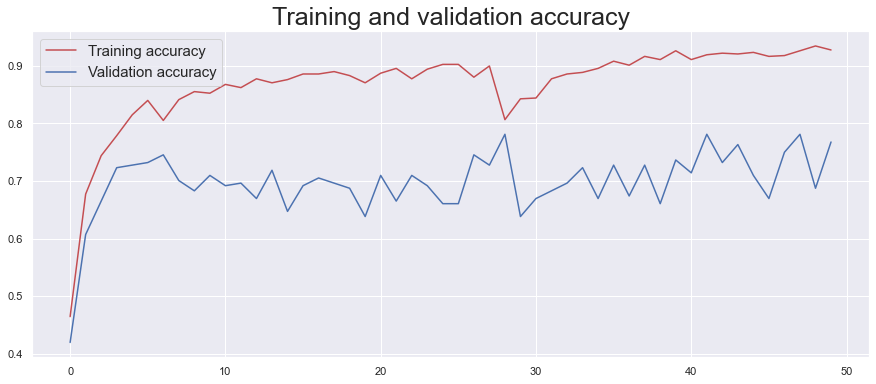

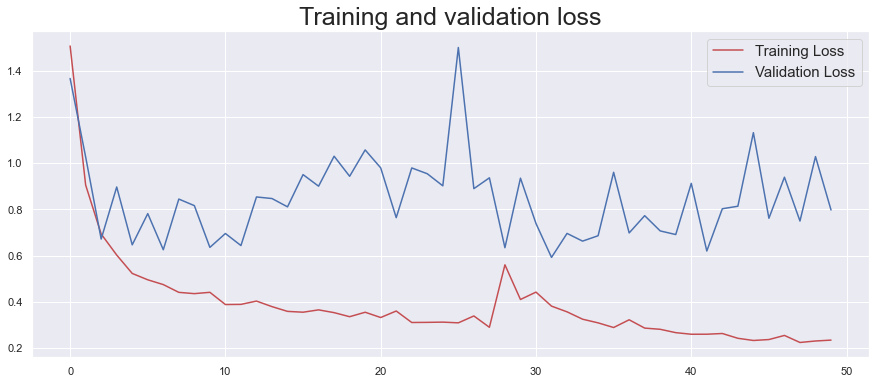

In [18]:
plot_loss_accuracy()

In [19]:
model1.evaluate_generator(test_generator)

[0.4432373344898224, 0.8571428656578064]

In [20]:
model1.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\plain_cnn_model.hdf5')

In [21]:
K.clear_session()

### ***VGG-16***

In [22]:
from keras.applications.vgg16 import VGG16

In [23]:
base_model_vgg16 = VGG16(weights = "imagenet", include_top = False, input_shape = (224, 224, 3))
for layer in base_model_vgg16.layers:
    layer.trainable = False

In [24]:
base_model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
img_input = Input(shape=(224, 224, 3))
x = base_model_vgg16(img_input)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45)(x)
output = Dense(4, activation='softmax')(x)


model2 = Model(inputs = img_input, outputs = output)

optimizer =Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model2.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [26]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\vgg16.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [27]:
history = model2.fit_generator(
    train_generator,
    epochs= 50,
    shuffle = True,
    #steps_per_epoch=20,
    validation_data=validation_generator,
    #validation_steps=23
)

Epoch 1/50
45/45 [==============================] - 26s 432ms/step - loss: 1.5065 - accuracy: 0.6815 - val_loss: 0.8073 - val_accuracy: 0.7411
Epoch 2/50
45/45 [==============================] - 9s 208ms/step - loss: 0.3233 - accuracy: 0.8804 - val_loss: 0.6058 - val_accuracy: 0.7634
Epoch 3/50
45/45 [==============================] - 9s 205ms/step - loss: 0.2648 - accuracy: 0.8985 - val_loss: 0.9825 - val_accuracy: 0.7054
Epoch 4/50
45/45 [==============================] - 9s 204ms/step - loss: 0.2409 - accuracy: 0.9138 - val_loss: 0.5300 - val_accuracy: 0.8125
Epoch 5/50
45/45 [==============================] - 9s 204ms/step - loss: 0.1843 - accuracy: 0.9332 - val_loss: 0.7753 - val_accuracy: 0.7098
Epoch 6/50
45/45 [==============================] - 9s 206ms/step - loss: 0.2086 - accuracy: 0.9221 - val_loss: 0.6647 - val_accuracy: 0.7991
Epoch 7/50
45/45 [==============================] - 9s 205ms/step - loss: 0.1990 - accuracy: 0.9277 - val_loss: 0.5912 - val_accuracy: 0.8170
Epoch

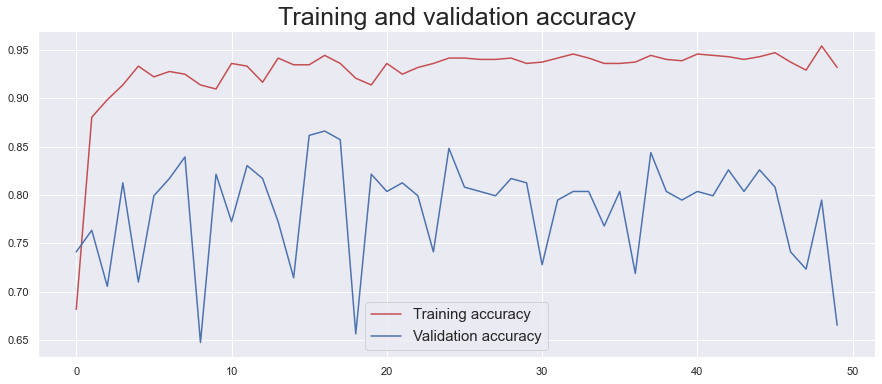

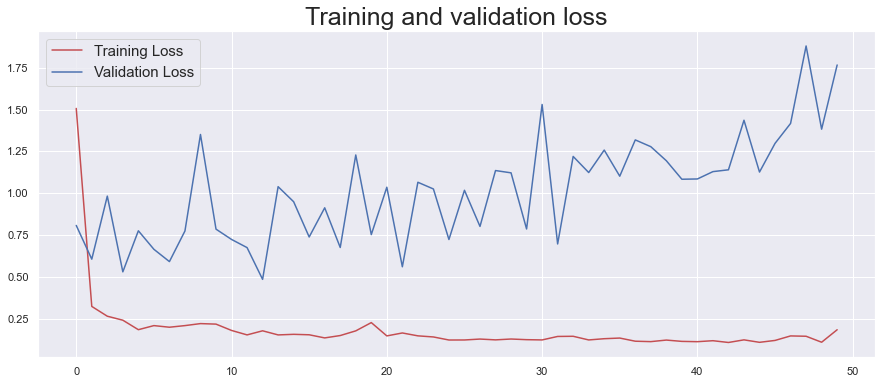

In [28]:
plot_loss_accuracy()

In [29]:
model2.evaluate_generator(test_generator)

[0.4882500171661377, 0.8571428656578064]

In [30]:
model2.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\VGG16.hdf5')

In [31]:
K.clear_session()

### ***Xception***

In [32]:
from tensorflow.keras.applications import Xception

base_model_xception = Xception(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in base_model_xception.layers:
    layer.trainable = False

83697664/83683744 [==============================] - 120s 1us/step


In [33]:
base_model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [34]:
img_input = Input(shape=(224, 224, 3))
x = base_model_xception(img_input)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.45)(x)
output = Dense(4, activation='softmax')(x)


model3 = Model(inputs = img_input, outputs = output)

optimizer =Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model3.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [35]:
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516   

In [36]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\Xception.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [37]:
history = model3.fit_generator(
    train_generator,
    epochs= 50,
    shuffle = True,
    #steps_per_epoch=20,
    validation_data=validation_generator,
    #validation_steps=23
)

Epoch 1/50
45/45 [==============================] - 13s 240ms/step - loss: 4.0858 - accuracy: 0.6259 - val_loss: 1.1143 - val_accuracy: 0.6562
Epoch 2/50
45/45 [==============================] - 9s 206ms/step - loss: 0.7947 - accuracy: 0.7650 - val_loss: 0.8014 - val_accuracy: 0.7098
Epoch 3/50
45/45 [==============================] - 9s 206ms/step - loss: 0.4399 - accuracy: 0.8442 - val_loss: 0.6567 - val_accuracy: 0.7054
Epoch 4/50
45/45 [==============================] - 9s 206ms/step - loss: 0.4265 - accuracy: 0.8651 - val_loss: 0.4751 - val_accuracy: 0.7902
Epoch 5/50
45/45 [==============================] - 9s 206ms/step - loss: 0.4233 - accuracy: 0.8637 - val_loss: 0.6083 - val_accuracy: 0.7455
Epoch 6/50
45/45 [==============================] - 9s 207ms/step - loss: 0.4052 - accuracy: 0.8498 - val_loss: 0.5238 - val_accuracy: 0.7366
Epoch 7/50
45/45 [==============================] - 9s 207ms/step - loss: 0.2830 - accuracy: 0.9166 - val_loss: 0.7025 - val_accuracy: 0.7366
Epoch

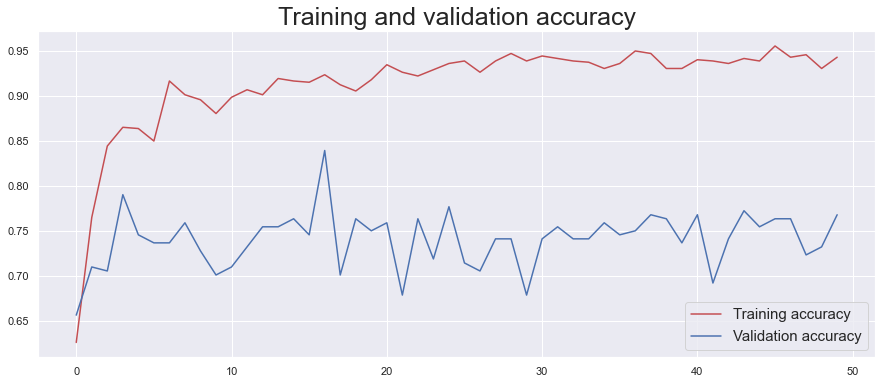

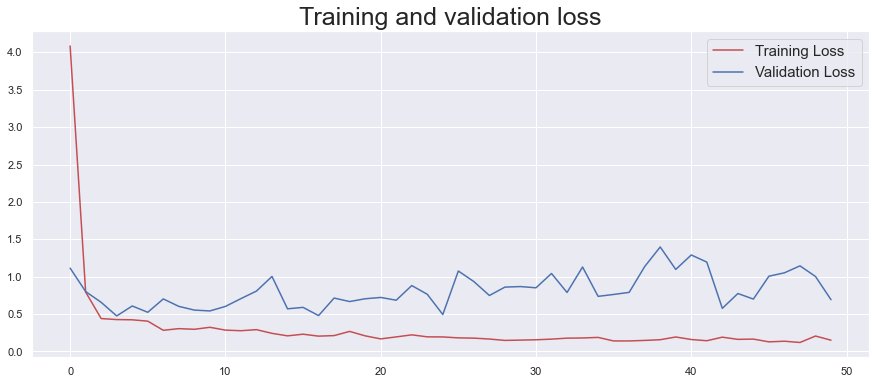

In [38]:
plot_loss_accuracy()

In [39]:
model3.evaluate_generator(test_generator)

[0.23731078207492828, 0.9340659379959106]

In [40]:
model3.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\Xception.hdf5')

In [41]:
K.clear_session()

### ***InceptionV3***

In [42]:
from keras.applications.inception_v3 import InceptionV3

In [43]:
base_model_inception = InceptionV3(weights="imagenet", include_top=False, input_shape=(224,224,3)) 
for layer in base_model_inception.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 124s 1us/step


In [44]:
base_model_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [45]:
img_input = Input(shape=(224, 224, 3))
x = base_model_inception(img_input)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.35)(x)
output = Dense(4, activation='softmax')(x)


model4 = Model(inputs = img_input, outputs = output)

optimizer =Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model4.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [46]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\Inception.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [47]:
history = model4.fit_generator(
    train_generator,
    epochs = 50,
    #steps_per_epoch=20,
    shuffle = True,
    validation_data=validation_generator,
    #validation_steps=23
)

Epoch 1/50
45/45 [==============================] - 13s 229ms/step - loss: 3.8414 - accuracy: 0.6551 - val_loss: 0.9747 - val_accuracy: 0.7098
Epoch 2/50
45/45 [==============================] - 8s 175ms/step - loss: 0.8343 - accuracy: 0.7844 - val_loss: 1.3024 - val_accuracy: 0.6429
Epoch 3/50
45/45 [==============================] - 8s 174ms/step - loss: 0.5924 - accuracy: 0.8248 - val_loss: 0.7169 - val_accuracy: 0.7679
Epoch 4/50
45/45 [==============================] - 8s 174ms/step - loss: 0.4116 - accuracy: 0.8581 - val_loss: 0.7668 - val_accuracy: 0.7232
Epoch 5/50
45/45 [==============================] - 8s 175ms/step - loss: 0.4565 - accuracy: 0.8456 - val_loss: 0.6468 - val_accuracy: 0.7411
Epoch 6/50
45/45 [==============================] - 8s 175ms/step - loss: 0.4022 - accuracy: 0.8637 - val_loss: 0.9195 - val_accuracy: 0.7500
Epoch 7/50
45/45 [==============================] - 8s 174ms/step - loss: 0.4342 - accuracy: 0.8651 - val_loss: 0.7028 - val_accuracy: 0.7321
Epoch

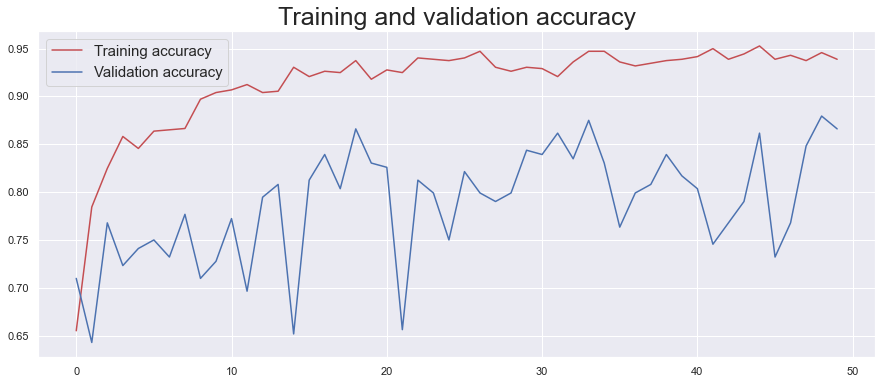

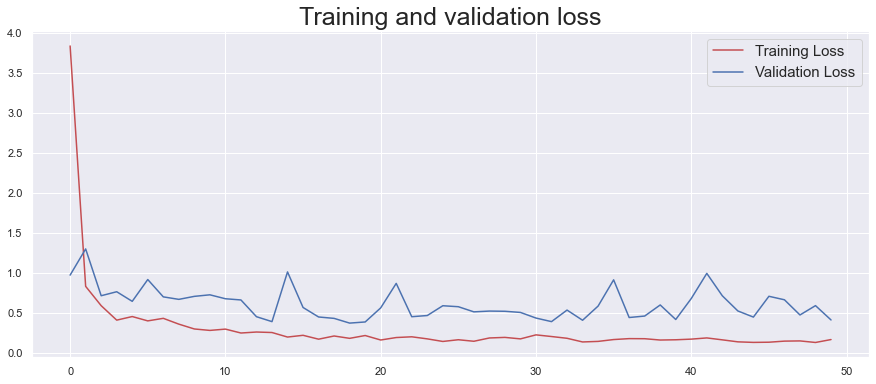

In [48]:
plot_loss_accuracy()

In [49]:
model4.evaluate_generator(test_generator)

[0.25037676095962524, 0.901098906993866]

In [50]:
model4.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\Inception.hdf5')

In [51]:
K.clear_session()

### ***ResNet50***

In [52]:
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [53]:
for layer in base_model_resnet.layers:
    layer.trainable = False

In [54]:
img_input = Input(shape=(224, 224, 3))
x = base_model_resnet(img_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.35)(x)
output = Dense(4, activation='softmax')(x)


model5 = Model(inputs = img_input, outputs = output)

optimizer=Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model5.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [55]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\ResNet50.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [56]:
history = model5.fit_generator(
    train_generator,
    epochs= 50,
    shuffle = True,
    #steps_per_epoch=20,
    validation_data=validation_generator,
    #validation_steps=23
)

Epoch 1/50
45/45 [==============================] - 12s 225ms/step - loss: 5.3029 - accuracy: 0.3255 - val_loss: 1.2866 - val_accuracy: 0.6429
Epoch 2/50
45/45 [==============================] - 9s 193ms/step - loss: 1.2457 - accuracy: 0.5661 - val_loss: 0.8619 - val_accuracy: 0.6384
Epoch 3/50
45/45 [==============================] - 9s 192ms/step - loss: 0.7832 - accuracy: 0.6885 - val_loss: 0.7623 - val_accuracy: 0.6071
Epoch 4/50
45/45 [==============================] - 9s 193ms/step - loss: 0.6430 - accuracy: 0.7344 - val_loss: 0.7854 - val_accuracy: 0.5893
Epoch 5/50
45/45 [==============================] - 9s 193ms/step - loss: 0.6689 - accuracy: 0.7274 - val_loss: 1.0422 - val_accuracy: 0.5446
Epoch 6/50
45/45 [==============================] - 9s 193ms/step - loss: 0.6647 - accuracy: 0.7371 - val_loss: 0.8257 - val_accuracy: 0.6384
Epoch 7/50
45/45 [==============================] - 9s 192ms/step - loss: 0.6669 - accuracy: 0.7204 - val_loss: 0.9669 - val_accuracy: 0.5357
Epoch

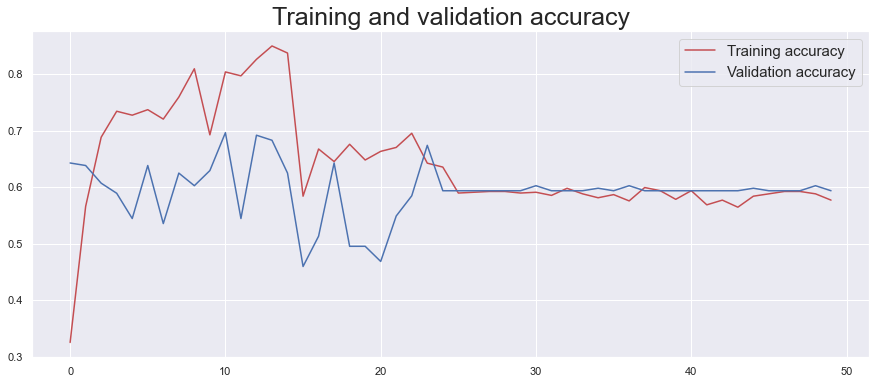

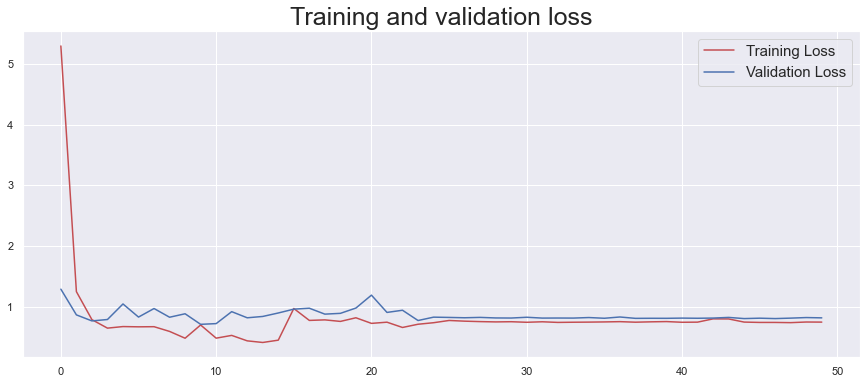

In [57]:
plot_loss_accuracy()

In [58]:
model5.evaluate_generator(test_generator)

[0.7866677641868591, 0.5494505763053894]

In [59]:
model5.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\ResNet50.hdf5')

In [60]:
K.clear_session()

### ***DenseNet***

In [61]:
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201

def DenseNet(model):
  base_model = model(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
  for layer in base_model.layers:
    layer.trainable = False
  img_input = Input(shape=(224, 224, 3))
  x = base_model(img_input)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.30)(x)
  output = Dense(4, activation='softmax')(x)


  model_dense = Model(inputs = img_input, outputs = output)

  optimizer=Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
  model_dense.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

  return model_dense

***DenseNet121***

In [62]:
model6 = DenseNet(model = DenseNet121)

29097984/29084464 [==============================] - 41s 1us/step


In [63]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet201.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [64]:
history = model6.fit_generator(
    train_generator,
    epochs= 50,
    shuffle = True,
    #steps_per_epoch=20,
    validation_data=validation_generator,
    #validation_steps=23
)

Epoch 1/50
45/45 [==============================] - 16s 259ms/step - loss: 2.7075 - accuracy: 0.6885 - val_loss: 0.8871 - val_accuracy: 0.6964
Epoch 2/50
45/45 [==============================] - 8s 182ms/step - loss: 0.7251 - accuracy: 0.8220 - val_loss: 0.8967 - val_accuracy: 0.6429
Epoch 3/50
45/45 [==============================] - 8s 182ms/step - loss: 0.5330 - accuracy: 0.8470 - val_loss: 0.5710 - val_accuracy: 0.7232
Epoch 4/50
45/45 [==============================] - 8s 184ms/step - loss: 0.3904 - accuracy: 0.8707 - val_loss: 0.4138 - val_accuracy: 0.7812
Epoch 5/50
45/45 [==============================] - 8s 182ms/step - loss: 0.3323 - accuracy: 0.8860 - val_loss: 0.7672 - val_accuracy: 0.7098
Epoch 6/50
45/45 [==============================] - 8s 182ms/step - loss: 0.2594 - accuracy: 0.8985 - val_loss: 0.4190 - val_accuracy: 0.8259
Epoch 7/50
45/45 [==============================] - 8s 181ms/step - loss: 0.2412 - accuracy: 0.8971 - val_loss: 0.5967 - val_accuracy: 0.7366
Epoch

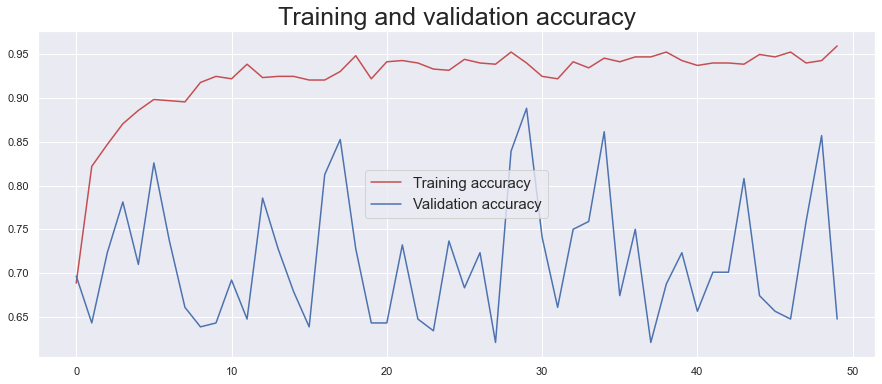

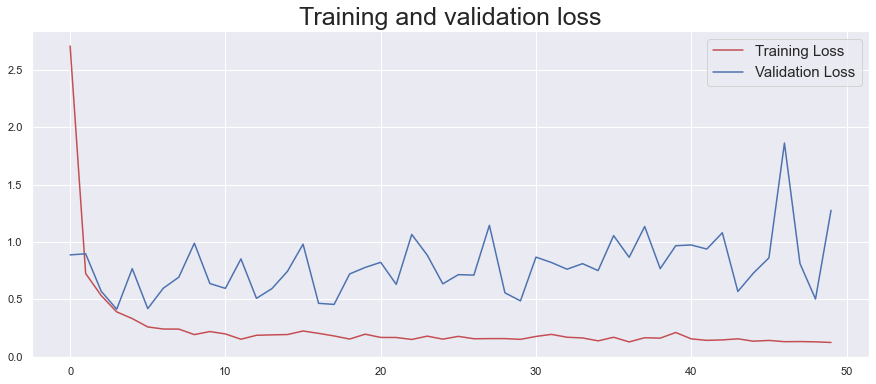

In [65]:
plot_loss_accuracy()

In [66]:
model6.evaluate_generator(test_generator)

[0.3384956419467926, 0.9120879173278809]

In [67]:
model6.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet121.hdf5')

In [68]:
K.clear_session()

***DenseNet169***

In [69]:
model7 = DenseNet(model = DenseNet169)

51888128/51877672 [==============================] - 74s 1us/step


In [70]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet169.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [71]:
history = model7.fit_generator(
    train_generator,
    epochs= 50,
    shuffle = True,
    #steps_per_epoch=20,
    validation_data=validation_generator,
    #validation_steps=23
)

Epoch 1/50
45/45 [==============================] - 17s 253ms/step - loss: 2.4624 - accuracy: 0.6565 - val_loss: 2.7282 - val_accuracy: 0.6384
Epoch 2/50
45/45 [==============================] - 9s 196ms/step - loss: 0.7096 - accuracy: 0.7997 - val_loss: 0.7198 - val_accuracy: 0.7143
Epoch 3/50
45/45 [==============================] - 9s 195ms/step - loss: 0.4698 - accuracy: 0.8289 - val_loss: 0.5533 - val_accuracy: 0.7455
Epoch 4/50
45/45 [==============================] - 9s 195ms/step - loss: 0.3765 - accuracy: 0.8554 - val_loss: 0.8045 - val_accuracy: 0.7366
Epoch 5/50
45/45 [==============================] - 9s 196ms/step - loss: 0.4036 - accuracy: 0.8540 - val_loss: 1.0138 - val_accuracy: 0.6830
Epoch 6/50
45/45 [==============================] - 9s 195ms/step - loss: 0.3941 - accuracy: 0.8790 - val_loss: 0.5088 - val_accuracy: 0.8080
Epoch 7/50
45/45 [==============================] - 9s 193ms/step - loss: 0.3340 - accuracy: 0.8846 - val_loss: 0.8403 - val_accuracy: 0.6920
Epoch

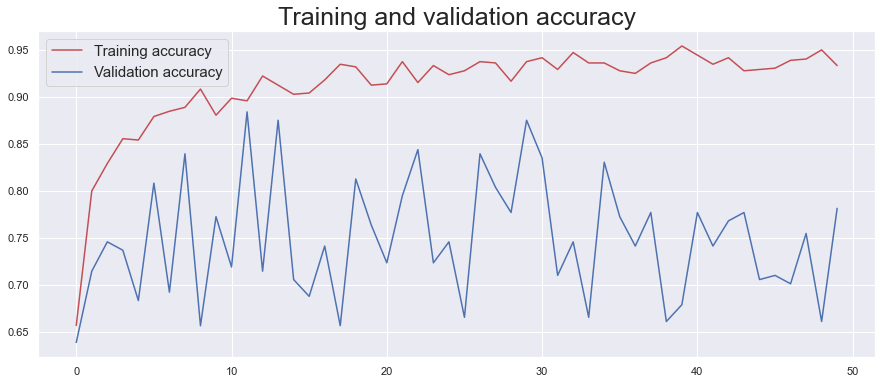

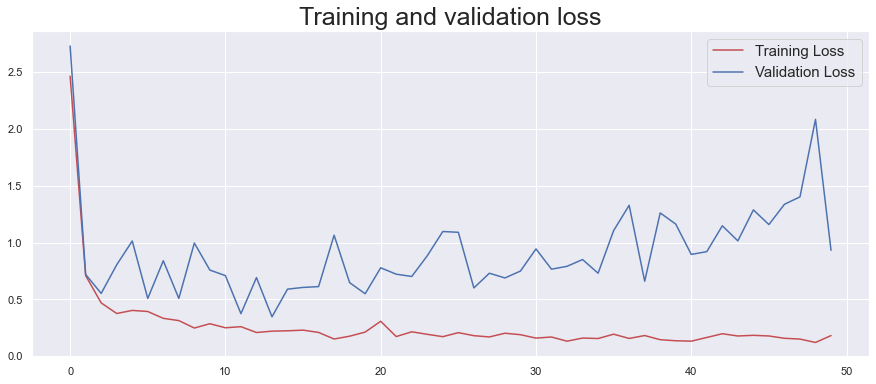

In [72]:
plot_loss_accuracy()

In [73]:
model7.evaluate_generator(test_generator)

[0.2972470223903656, 0.8681318759918213]

In [74]:
model7.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet169.hdf5')

In [75]:
K.clear_session()

***DenseNet201***

In [76]:
model8 = DenseNet(model = DenseNet201)

In [77]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights = True)
mod_chk = ModelCheckpoint(filepath = "D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet201.hdf5", monitor = 'val_loss', save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.001)

In [78]:
history = model8.fit_generator(
    train_generator,
    epochs= 50,
    shuffle = True,
    #steps_per_epoch=20,
    validation_data=validation_generator,
    #validation_steps=23
)

Epoch 1/50
45/45 [==============================] - 20s 306ms/step - loss: 2.9348 - accuracy: 0.6606 - val_loss: 1.1292 - val_accuracy: 0.6384
Epoch 2/50
45/45 [==============================] - 11s 239ms/step - loss: 0.8424 - accuracy: 0.7789 - val_loss: 0.7011 - val_accuracy: 0.6518
Epoch 3/50
45/45 [==============================] - 11s 238ms/step - loss: 0.5518 - accuracy: 0.8373 - val_loss: 0.5024 - val_accuracy: 0.6875
Epoch 4/50
45/45 [==============================] - 11s 239ms/step - loss: 0.3188 - accuracy: 0.8832 - val_loss: 0.4808 - val_accuracy: 0.7857
Epoch 5/50
45/45 [==============================] - 11s 238ms/step - loss: 0.2903 - accuracy: 0.8957 - val_loss: 0.4401 - val_accuracy: 0.7366
Epoch 6/50
45/45 [==============================] - 11s 238ms/step - loss: 0.2951 - accuracy: 0.8860 - val_loss: 0.8027 - val_accuracy: 0.7232
Epoch 7/50
45/45 [==============================] - 11s 238ms/step - loss: 0.2735 - accuracy: 0.8860 - val_loss: 1.0252 - val_accuracy: 0.6741

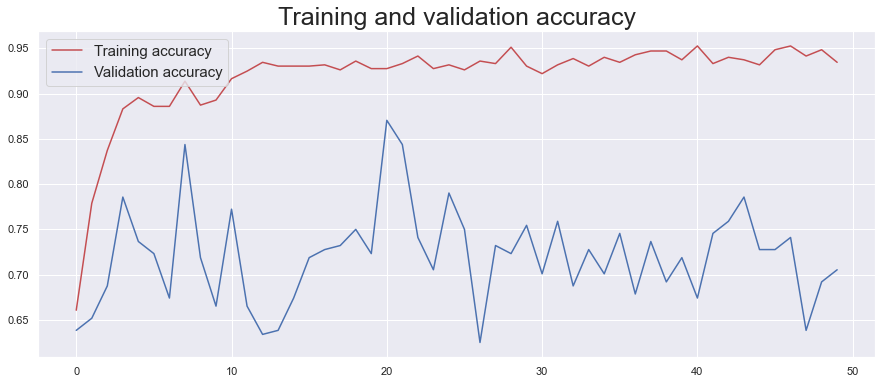

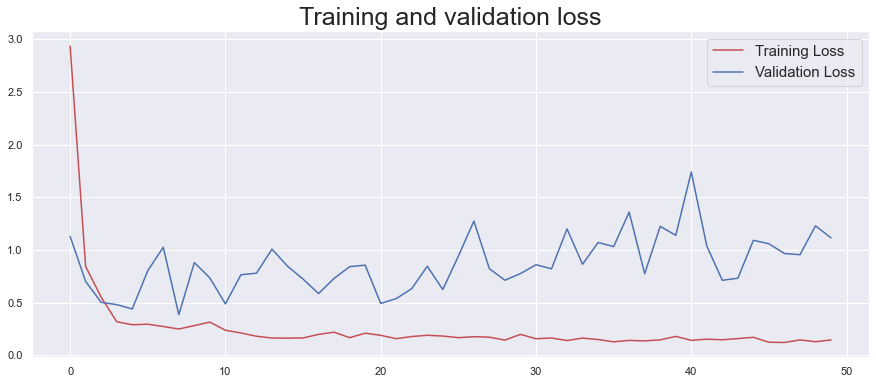

In [79]:
plot_loss_accuracy()

In [80]:
model8.evaluate_generator(test_generator)

[0.18987175822257996, 0.9230769276618958]

In [81]:
model8.save('D:\Teletalk Intern(Image Recognition)\photo_for_test\DenseNet201.hdf5')

In [82]:
K.clear_session()